In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [1]:
!pip install chart_studio

In [2]:
from plotly.offline import init_notebook_mode, iplot
#from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
# import plotly.plotly as py
import chart_studio.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [3]:
path = ""

In [4]:
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = app_train[app_train["TARGET"] == 1]
    df0 = app_train[app_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2

In [5]:
app_train = pd.read_csv(path + "application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_train.shape

(307511, 122)

#### Distribution of Target
As you can see there is a class imbalance. 91% of the data corresponds to Target value = 0

In [8]:
bar_hor(app_train, "TARGET", "Distribution of Target Variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['Target : 1','Target : 0'])

#### Geneder type of applicants
More women have applied for loans (about twice the number of men). But if you look at target variables, men default more than women.
Around 10% of the total men re deaulters here compared to 7% for women applicants

In [9]:
tr0 = bar_hor(app_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

#### Applicants family Status
Married people have applied for a large proportion of loans. But the single, civil married and seprated applicants have higher chance of being defaulters

In [10]:
tr0 = bar_hor(app_train, "NAME_FAMILY_STATUS", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('NAME_FAMILY_STATUS', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Family Status Distribution" , "Family Status, Target = 1" ,"Family Status, Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig)

#### Applicants owning Real Estate or Car
Almost 70% of the applicants own realty but just 34% own a car. 
People who dont own a property or a car are likely to default more.

In [11]:
## real estate 
t = app_train['FLAG_OWN_REALTY'].value_counts()
labels = t.index
values = t.values
colors = ['#96D38C','#FEBFB3']
trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Owning Real Estate', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


t = app_train['FLAG_OWN_CAR'].value_counts()
labels = t.index
values = t.values
colors = ['#FEBFB3','#96D38C']
trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Owning Car', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


tr1, tr2 = gp('FLAG_OWN_REALTY', 'Applicants Owning Real Estate wrt Target Variable')
tr3, tr4 = gp('FLAG_OWN_CAR', 'Applicants Owning Car wrt Target Variable')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["% Applicants with RealEstate and Target = 1", "% Applicants with Car and Target = 1"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

#### Who accompanied the clients when they came to file the application ?
Vast majority of them were unaccompanied(80%). Around 13% were accompanied by family
- Unaccompanined (about 248K applicants) 
- Family (about 40K applicants)  
- Spouse, partner (about 11K applicants) 

#### What are their income types ?
- Working Class (158K)
- Commercial Associate (71K)
- Pensiner (55K)

In [12]:

#### Who accompanied the clients when they came to file the application ?
tr0 = bar_hor(app_train, "NAME_TYPE_SUITE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

#### How does the target vary based on these?
There is not much variation with the 'applicant type suite' attribute. We could see a slight peak at 'Other_B'(10%). Rest all are concentrated around the 8% mark. Applicants whio were accompanied by childern were the least likely to default 

There is NO surprise that Unemployed applicants are likely to default more. However, to our surprise, applicants who are on maternity leave have the highest % of defaulters!
Students and Businessmen have almost 100% certainty of repayment.

In [13]:
tr1, tr2 = gp('NAME_TYPE_SUITE', 'Applicants Type Suites which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Type Suites distribution when Target = 1", "Applicants Type Suites distribution when Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);


tr1, tr2 = gp('NAME_INCOME_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Income Types when Target = 1", "Applicants Income Type When Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

#### What type of Loans?
Cash loans dominate(91%)

In [14]:
t = app_train['NAME_CONTRACT_TYPE'].value_counts()
labels = t.index
values = t.values
colors = ['#FEBFB3','#96D38C']
trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))
layout = go.Layout(title='Applicants Contract Type', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

#### Applicants' Education Type and Housing

In [15]:
tr1 = bar_hor(app_train, "NAME_EDUCATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "NAME_HOUSING_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Education Type', 'Applicants Housing Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);


tr1, tr2 = gp('NAME_EDUCATION_TYPE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('NAME_HOUSING_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Education Types, Target=1", "Applicants Housing Type, Target=1"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=30));
iplot(fig);

A large number of applications (218K) are filed by people having secondary education followed by people with Higher Education with 75K applications. Applicants living in House / apartments has the highest number of loan apllications equal to 272K. 

Applicants with Lower Secondary/Secondary/Incomplete education have the highest percentage of payment related problems. Also, Applicants living in rented apartments or living with parents also show the same trend.

#### Organization and Occupation Type

In [16]:
tr1 = bar_hor(app_train, "ORGANIZATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "OCCUPATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Organization Type', 'Applicants Occupation Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=600, showlegend=False, margin=dict(l=150));
iplot(fig);

Business Entity Type 3, XNA and Self employed are rge top 3 organizaion Types. Labourers, Sales staffs constitutes the bulk of occupation type, while the least # of applicants fall in the IT domain.

#### How target varies according to these?

In [17]:
tr1, tr2 = gp('ORGANIZATION_TYPE', 'Applicants Income Types who havent repayed the loan')
tr3, tr4 = gp('OCCUPATION_TYPE', 'Applicants Income Types who havent repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Organization Types - Not Repayed", "Applicants Occupation Type - Repayed"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

Transport type 3 organization has the highest % of defaulters(almost 15%). Industry type 13, construction etc also have a higher concentration of defaulters
Low skill laborers have higher chance of defaulting(17%). Least prbabale are accuntants, IT staff, high skilled laborers.

#### Wall materials, house type

In [18]:
tr1 = bar_hor(app_train, "FONDKAPREMONT_MODE", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "WALLSMATERIAL_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)
tr1 = bar_hor(app_train, "HOUSETYPE_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = [ 'House Type', 'Walls Material'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
# fig.append_trace(tr3, 1, 3);

fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

People living in block of flats have files the highest number of loans, whereas those who own specific housing are less.
Panel, stone, brick comprise the bulk of wall mterials


#### How does the target variable vary?

In [19]:
tr1, tr2 = gp('HOUSETYPE_MODE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('WALLSMATERIAL_MODE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ["HouseTypes - Defaulted", "WallsMaterial - Defaulted"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

#### Distribution of amount of credit

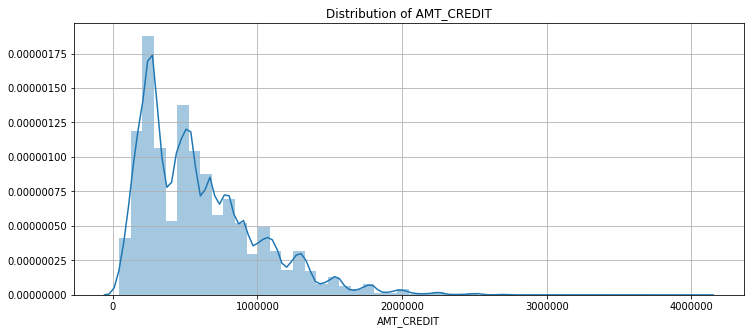

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])
plt.grid()

#### Distribution of Amount Annuity

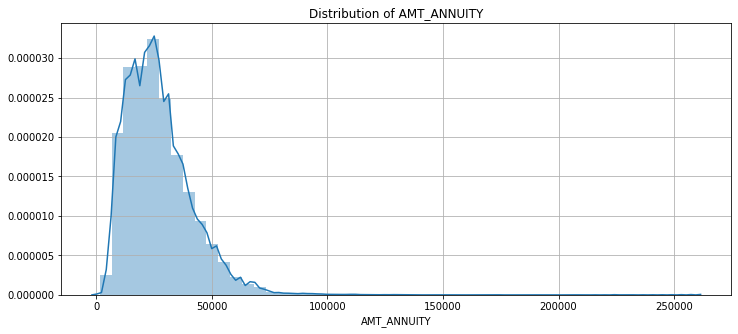

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(app_train["AMT_ANNUITY"].dropna())
plt.grid()

#### Days employed

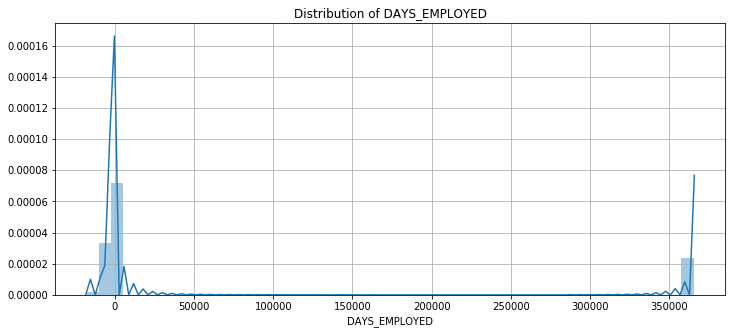

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_EMPLOYED")
ax = sns.distplot(app_train["DAYS_EMPLOYED"])
plt.grid()

#### How many family members the applicant has?

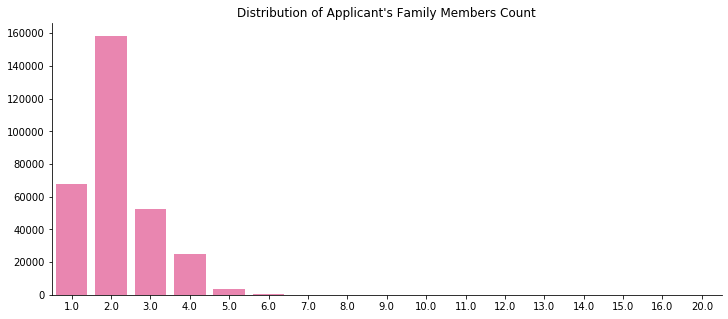

In [23]:
t = app_train["CNT_FAM_MEMBERS"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Applicant's Family Members Count");
ax = sns.barplot(data=t1, x="x", y="y", color="#f975ae");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

In [24]:
tr1, tr2 = gp('CNT_FAM_MEMBERS', 'Applicants Family members')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Family members, Target=1", "Applicants Family members, Target=0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=30));
iplot(fig);

There are a few outliers, but the general trend is that there is a tendency to default when there are more members in family